In [7]:
import os
import zipfile
import random
import shutil
import numpy as np
from shutil import copyfile

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

In [8]:
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
data_path = "drive/My Drive/archive.zip"

In [10]:

zip_ref = zipfile.ZipFile(data_path)
zip_ref.extractall('/tmp')
zip_ref.close()

In [11]:
def make_dir(PATH):
  if not os.path.exists(PATH):
      os.mkdir(PATH)
      return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

In [12]:
try:
    base_dir = '/tmp'
    fruit_dir = make_dir(os.path.join(base_dir, 'fruit-dataset'))
    train_dir = make_dir(os.path.join(fruit_dir, 'train'))
    validation_dir = make_dir(os.path.join(fruit_dir, 'val'))
    test_dir = make_dir(os.path.join(fruit_dir, 'test'))
    preview_dir = make_dir(os.path.join(fruit_dir, 'preview'))

    train_fresh_apples_dir = make_dir(os.path.join(train_dir, 'Fresh Apples'))
    train_fresh_bananas_dir = make_dir(os.path.join(train_dir, 'Fresh Bananas'))
    train_fresh_oranges_dir = make_dir(os.path.join(train_dir, 'Fresh Oranges'))
    train_rotten_apples_dir = make_dir(os.path.join(train_dir, 'Rotten Apples'))
    train_rotten_bananas_dir = make_dir(os.path.join(train_dir, 'Rotten Bananas'))
    train_rotten_oranges_dir = make_dir(os.path.join(train_dir, 'Rotten Oranges'))

    validation_fresh_apples_dir = make_dir(os.path.join(validation_dir, 'Fresh Apples'))
    validation_fresh_bananas_dir = make_dir(os.path.join(validation_dir, 'Fresh Bananas'))
    validation_fresh_oranges_dir = make_dir(os.path.join(validation_dir, 'Fresh Oranges'))
    validation_rotten_apples_dir = make_dir(os.path.join(validation_dir, 'Rotten Apples'))
    validation_rotten_bananas_dir = make_dir(os.path.join(validation_dir, 'Rotten Bananas'))
    validation_rotten_oranges_dir = make_dir(os.path.join(validation_dir, 'Rotten Oranges'))

    test_fresh_apples_dir = make_dir(os.path.join(test_dir, 'Fresh Apples'))
    test_fresh_bananas_dir = make_dir(os.path.join(test_dir, 'Fresh Bananas'))
    test_fresh_oranges_dir = make_dir(os.path.join(test_dir, 'Fresh Oranges'))
    test_rotten_apples_dir = make_dir(os.path.join(test_dir, 'Rotten Apples'))
    test_rotten_bananas_dir = make_dir(os.path.join(test_dir, 'Rotten Bananas'))
    test_rotten_oranges_dir = make_dir(os.path.join(test_dir, 'Rotten Oranges'))

except OSError:
    pass

In [13]:
from PIL import Image

def split_data(SOURCE='', TRAINING='', VALIDATION='', SPLIT_SIZE=0):
  data = os.listdir(SOURCE)
  random_data = random.sample(data, len(data))

  train_size = len(data)*SPLIT_SIZE

  for i, filename in enumerate(random_data):
    filepath = os.path.join(SOURCE, filename)
    if os.path.getsize(filepath) > 0:
      if i < train_size:
        copyfile(filepath, os.path.join(TRAINING, filename))
        # img = Image.open(os.path.join(TRAINING, filename)).convert('L')
        # img.save(os.path.join(TRAINING, filename))
      else:
        copyfile(filepath, os.path.join(VALIDATION, filename))
        # img = Image.open(os.path.join(VALIDATION, filename)).convert('L')
        # img.save(os.path.join(VALIDATION, filename))

In [14]:
dataset_train_dir = '/tmp/dataset/train'
dataset_test_dir = '/tmp/dataset/test'

fapples_train_dir = os.path.join(dataset_train_dir, 'freshapples')
fbananas_train_dir = os.path.join(dataset_train_dir, 'freshbanana')
foranges_train_dir = os.path.join(dataset_train_dir, 'freshoranges')
rapples_train_dir = os.path.join(dataset_train_dir, 'rottenapples')
rbananas_train_dir = os.path.join(dataset_train_dir, 'rottenbanana')
roranges_train_dir = os.path.join(dataset_train_dir, 'rottenoranges')

fapples_test_dir = os.path.join(dataset_test_dir, 'freshapples')
fbananas_test_dir = os.path.join(dataset_test_dir, 'freshbanana')
foranges_test_dir = os.path.join(dataset_test_dir, 'freshoranges')
rapples_test_dir = os.path.join(dataset_test_dir, 'rottenapples')
rbananas_test_dir = os.path.join(dataset_test_dir, 'rottenbanana')
roranges_test_dir = os.path.join(dataset_test_dir, 'rottenoranges')

print('fapples_train images = ', len(os.listdir(fapples_train_dir)))
print('fbananas_train images = ', len(os.listdir(fbananas_train_dir)))
print('foranges_train images = ', len(os.listdir(foranges_train_dir)))
print('rapples_train images = ', len(os.listdir(rapples_train_dir)))
print('rbananas_train images = ', len(os.listdir(rbananas_train_dir)))
print('roranges_train images = ', len(os.listdir(roranges_train_dir)))
print()
print('fapples_test images = ', len(os.listdir(fapples_test_dir)))
print('fbananas_test images = ', len(os.listdir(fbananas_test_dir)))
print('foranges_test images = ', len(os.listdir(foranges_test_dir)))
print('rapples_test images = ', len(os.listdir(rapples_test_dir)))
print('rbananas_test images = ', len(os.listdir(rbananas_test_dir)))
print('roranges_test images = ', len(os.listdir(roranges_test_dir)))

fapples_train images =  1693
fbananas_train images =  1581
foranges_train images =  1466
rapples_train images =  2342
rbananas_train images =  2224
roranges_train images =  1595

fapples_test images =  395
fbananas_test images =  381
foranges_test images =  388
rapples_test images =  601
rbananas_test images =  530
roranges_test images =  403


In [15]:
SPLIT_SIZE = 0.67
split_data(fapples_train_dir, train_fresh_apples_dir, validation_fresh_apples_dir, SPLIT_SIZE)
split_data(fbananas_train_dir, train_fresh_bananas_dir, validation_fresh_bananas_dir, SPLIT_SIZE)
split_data(foranges_train_dir, train_fresh_oranges_dir, validation_fresh_oranges_dir, SPLIT_SIZE)
split_data(rapples_train_dir, train_rotten_apples_dir, validation_rotten_apples_dir, SPLIT_SIZE)
split_data(rbananas_train_dir, train_rotten_bananas_dir, validation_rotten_bananas_dir, SPLIT_SIZE)
split_data(roranges_train_dir, train_rotten_oranges_dir, validation_rotten_oranges_dir, SPLIT_SIZE)

SPLIT_SIZE = 1.0
split_data(fapples_test_dir, test_fresh_apples_dir, validation_fresh_apples_dir, SPLIT_SIZE)
split_data(fbananas_test_dir, test_fresh_bananas_dir, validation_fresh_bananas_dir, SPLIT_SIZE)
split_data(foranges_test_dir, test_fresh_oranges_dir, validation_fresh_oranges_dir, SPLIT_SIZE)
split_data(rapples_test_dir, test_rotten_apples_dir, validation_rotten_apples_dir, SPLIT_SIZE)
split_data(rbananas_test_dir, test_rotten_bananas_dir, validation_rotten_bananas_dir, SPLIT_SIZE)
split_data(roranges_test_dir, test_rotten_oranges_dir, validation_rotten_oranges_dir, SPLIT_SIZE)

In [16]:
print(len(os.listdir('/tmp/fruit-dataset/train/Fresh Apples/')))
print(len(os.listdir('/tmp/fruit-dataset/train/Fresh Bananas/')))
print(len(os.listdir('/tmp/fruit-dataset/train/Fresh Oranges/')))
print(len(os.listdir('/tmp/fruit-dataset/train/Rotten Apples/')))
print(len(os.listdir('/tmp/fruit-dataset/train/Rotten Bananas/')))
print(len(os.listdir('/tmp/fruit-dataset/train/Rotten Oranges/')))
print()
print(len(os.listdir('/tmp/fruit-dataset/val/Fresh Apples/')))
print(len(os.listdir('/tmp/fruit-dataset/val/Fresh Bananas/')))
print(len(os.listdir('/tmp/fruit-dataset/val/Fresh Oranges/')))
print(len(os.listdir('/tmp/fruit-dataset/val/Rotten Apples/')))
print(len(os.listdir('/tmp/fruit-dataset/val/Rotten Bananas/')))
print(len(os.listdir('/tmp/fruit-dataset/val/Rotten Oranges/')))
print()
print(len(os.listdir('/tmp/fruit-dataset/test/Fresh Apples/')))
print(len(os.listdir('/tmp/fruit-dataset/test/Fresh Bananas/')))
print(len(os.listdir('/tmp/fruit-dataset/test/Fresh Oranges/')))
print(len(os.listdir('/tmp/fruit-dataset/test/Rotten Apples/')))
print(len(os.listdir('/tmp/fruit-dataset/test/Rotten Bananas/')))
print(len(os.listdir('/tmp/fruit-dataset/test/Rotten Oranges/')))

1135
1060
983
1570
1491
1069

558
521
483
772
733
526

395
381
388
601
530
403


In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2, #0.2, 0.5
    height_shift_range=0.2, #0.2, 0.5
    shear_range=0.2,
    zoom_range=[0.5, 1.0], # 0.2, 0.5, [0.5,1.0]
    rotation_range=90, #20, 40, 60, 90
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect' #nearest, reflect, wrap
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

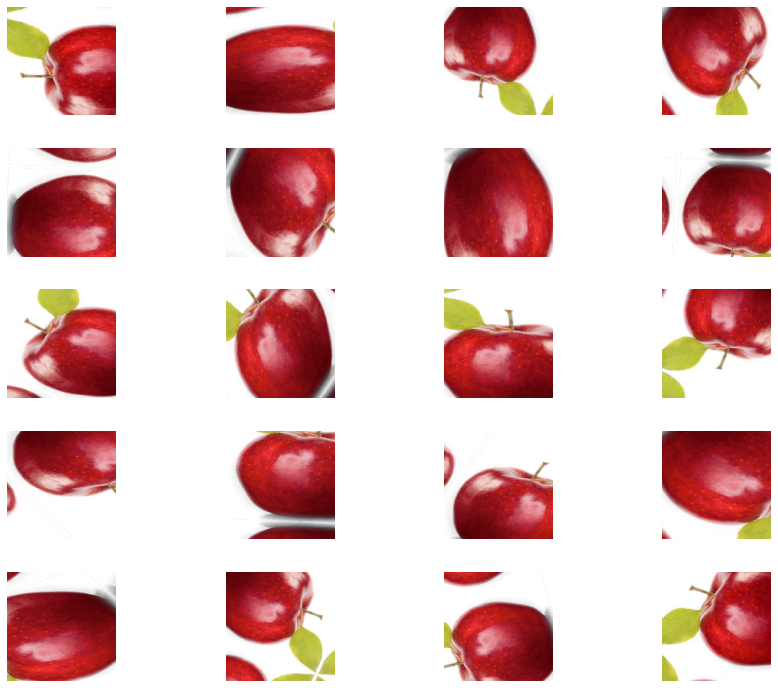

In [18]:
path_aug = os.path.join(train_fresh_apples_dir, os.listdir(train_fresh_apples_dir)[-1])
img_augmentation = image.load_img(path_aug)
x_aug = image.img_to_array(img_augmentation)
x_aug = x_aug.reshape((1,) + x_aug.shape)

i = 0
for batch in train_datagen.flow(x_aug, batch_size=1, save_to_dir=preview_dir, save_prefix='fruit', save_format='jpeg'):
    i += 1
    if i >= 20:
        break

preview_img = os.listdir(preview_dir)

plt.figure(figsize=(15, 15))
for n in range(len(preview_img)):
  plt.subplot((len(preview_img)/4)+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(os.path.join(preview_dir, preview_img[n]),
                            color_mode="rgb",
                            target_size=(150, 150),
                            interpolation="nearest"))
  plt.axis('off')
plt.show()

for fn in preview_img:
  os.system(f'rm {os.path.join(preview_dir, fn)}')

In [19]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    # shuffle = False,
                                                    target_size=(150,150), #?
                                                    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         color_mode="rgb",
                                                         # shuffle = False,
                                                         target_size=(150,150), #?
                                                         class_mode='categorical')

Found 7308 images belonging to 6 classes.
Found 3593 images belonging to 6 classes.


In [20]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.98):
      print("\nReached 98% accuracy. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()

In [21]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0

In [22]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
import pandas as pd

pre_trained_model = InceptionV3(input_shape=(150,150,3),
                                include_top=False)

for layer in pre_trained_model.layers:
    layer.trainable = False

x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(6, activation='softmax')(x)

model = Model(pre_trained_model.input, x) 
model.compile(optimizer='adam', #RMSprop(lr=0.0001), adam
              loss='categorical_crossentropy',
              metrics=['accuracy'])

pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in pre_trained_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fd2c01f0d50>,input_2,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd2c01f1f90>,conv2d_97,False
2,<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd2c01eb210>,batch_normalization_94,False
3,<tensorflow.python.keras.layers.core.Activation object at 0x7fd2c0682890>,activation_94,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd2bb883050>,conv2d_98,False
...,...,...,...
306,<tensorflow.python.keras.layers.core.Activation object at 0x7fd2bb4b0250>,activation_179,False
307,<tensorflow.python.keras.layers.merge.Concatenate object at 0x7fd2bb478190>,mixed9_1,False
308,<tensorflow.python.keras.layers.merge.Concatenate object at 0x7fd2bb43b990>,concatenate_3,False
309,<tensorflow.python.keras.layers.core.Activation object at 0x7fd2bb45f090>,activation_187,False


In [23]:
train_len = 0
for foldername in os.listdir('/tmp/fruit-dataset/train'):
    train_len = train_len + len(os.listdir(os.path.join('/tmp/fruit-dataset/train',foldername)))
    
val_len = 0
for foldername in os.listdir('/tmp/fruit-dataset/val'):
    val_len = val_len + len(os.listdir(os.path.join('/tmp/fruit-dataset/val',foldername)))

print(train_len)
print(val_len)

7308
3593


In [24]:
history = model.fit(
    train_generator,
    steps_per_epoch=(train_len/32),
    epochs=60,
    verbose=1,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=(val_len/32)
)

Epoch 1/60
228/228 [==============================] - 149s 498ms/step - loss: 11.5215 - accuracy: 0.7334 - val_loss: 0.2298 - val_accuracy: 0.9196
Epoch 2/60
228/228 [==============================] - 110s 483ms/step - loss: 0.3156 - accuracy: 0.8974 - val_loss: 0.1988 - val_accuracy: 0.9318
Epoch 3/60
228/228 [==============================] - 111s 486ms/step - loss: 0.2648 - accuracy: 0.9047 - val_loss: 0.1876 - val_accuracy: 0.9315
Epoch 4/60
228/228 [==============================] - 110s 482ms/step - loss: 0.2423 - accuracy: 0.9168 - val_loss: 0.1996 - val_accuracy: 0.9354
Epoch 5/60
228/228 [==============================] - 110s 483ms/step - loss: 0.2475 - accuracy: 0.9118 - val_loss: 0.2193 - val_accuracy: 0.9271
Epoch 6/60
228/228 [==============================] - 111s 486ms/step - loss: 0.2200 - accuracy: 0.9218 - val_loss: 0.2132 - val_accuracy: 0.9274
Epoch 7/60
228/228 [==============================] - 111s 486ms/step - loss: 0.2191 - accuracy: 0.9236 - val_loss: 0.1475 

## Plot Loss and Accuracy

<Figure size 432x288 with 0 Axes>

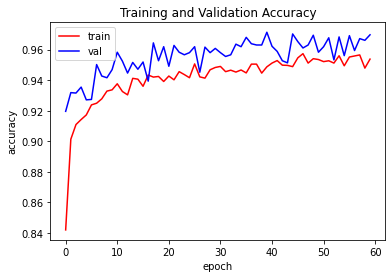

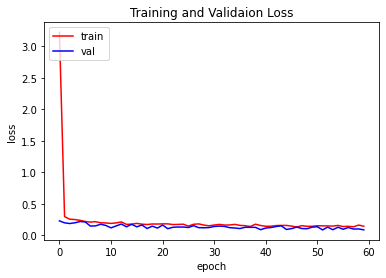

<Figure size 432x288 with 0 Axes>

In [25]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [26]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                  target_size=(150, 150),
                                                  shuffle = False,
                                                  class_mode='categorical')

filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)

Found 2698 images belonging to 6 classes.
2698/2698 [==============================] - 77s 28ms/step - loss: 0.0492 - accuracy: 0.9859
accuracy test:  0.98591548204422


In [27]:
model.save('drive/My Drive/model.h5')

Saving WhatsApp Image 2021-05-06 at 3.14.16 PM (2).jpeg to WhatsApp Image 2021-05-06 at 3.14.16 PM (2).jpeg


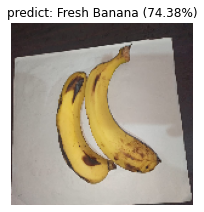

In [30]:
from keras.utils import get_file
import pathlib
import cv2

model_predict = tf.keras.models.load_model('drive/My Drive/model.h5')
model_predict.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

uploaded = files.upload()
image_name = []
image_conf = []
predict_result = []

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, color_mode="rgb", target_size=(150, 150), interpolation="nearest")
  # imgplot = plt.imshow(img)
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  images = np.vstack([img])
  classes = model_predict.predict(images, batch_size=10)

  max = np.amax(classes[0])
  if np.where(classes[0] == max)[0] == 0:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Apple')
  elif np.where(classes[0] == max)[0] == 1:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Banana')
  elif np.where(classes[0] == max)[0] == 2:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Orange')
  elif np.where(classes[0] == max)[0] == 3:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Apple')
  elif np.where(classes[0] == max)[0] == 4:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Banana')
  else:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten orange')

plt.figure(figsize=(15, 15))
for n in range(len(image_name)):
  plt.subplot((len(image_name)/4)+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(image_name[n], color_mode="rgb", target_size=(150, 150), interpolation="nearest"))
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"
  plt.title(title, color='black')
  plt.axis('off')
plt.show()

for fn in image_name:
  os.system(f'rm {fn}')